#           AE 102 ASSIGNMENT 2

**Q1)** python function to simulate the throw of a cubic die and plot probability of each outcome wrt no of trials

In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from numpy.random import random
from numpy.random import randint #mathematical tool for all problems

The **randint** function can be used to obtain a random **integer** in a prescribed range. Thus the perfect tool for generating random variables for cubic die throw. Now we design a function that takes in input no of experiments and the required random variable whose probability is to be calculated and returns the fraction of occurence . Before that we have to make a function that simulates the experiment.
$\mathbb{R}$

In [2]:
def die_throw():    #calling this function is equivalent to throwing a die as it gives an random variable output
    outcome = randint(1,7)
    return outcome   
die_throw() #doing experiment

5

In [9]:
def prob_calc(N,rv):
    outcome_set = [ die_throw() for i in range(N)]
    count = 0
    for h in outcome_set:
        if (h==rv):
            count = count +1
    fraction = count/N
    return fraction  

Now since we have a fraction calculating function for N throws its time to plot stem graphs for each value of rv

In [19]:
ns = [10*i for i in range(1,201)]   # experiment no array (scale 10)
fs_1 = [prob_calc(h,1) for h in ns] # fraction array fs_i for random value = i
fs_2 = [prob_calc(h,2) for h in ns]
fs_3 = [prob_calc(h,3) for h in ns]
fs_4 = [prob_calc(h,4) for h in ns]
fs_5 = [prob_calc(h,5) for h in ns]
fs_6 = [prob_calc(h,6) for h in ns]

<StemContainer object of 3 artists>

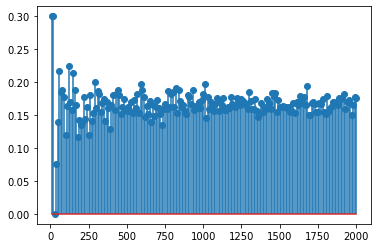

In [18]:
stem(ns,fs_1) #stem(ns, fs_i denotes no of experiments vs fraction of occurence of rv = i

<StemContainer object of 3 artists>

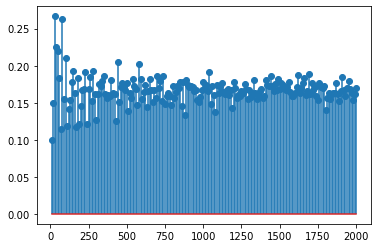

In [21]:
stem(ns,fs_2)


<StemContainer object of 3 artists>

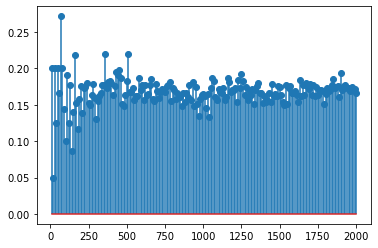

In [22]:
stem(ns,fs_3)


<StemContainer object of 3 artists>

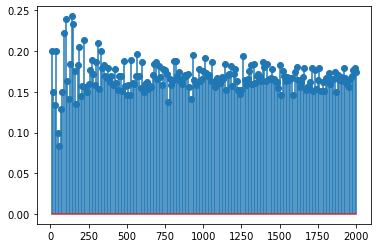

In [23]:
stem(ns,fs_4)

<StemContainer object of 3 artists>

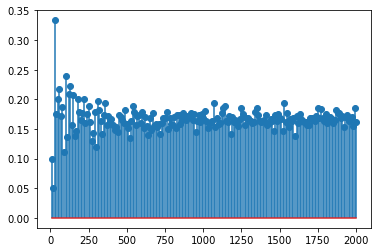

In [24]:
stem(ns,fs_5)


<StemContainer object of 3 artists>

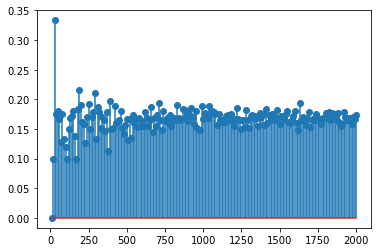

In [25]:
stem(ns,fs_6)

We have done upto 2000 experiments and and when no of experiments reach larger values the fraction (of all rvs) seems to converge to a value between 0.15 and 0.20 ( according to theory $\frac{1}{6}$ ) . Lets verify this theory by comparing normal plots

Text(0, 0.5, 'fraction')

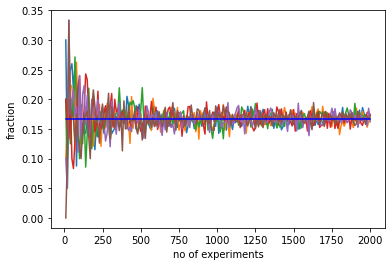

In [31]:
convg = [ 1/6 for i in ns]
plot(ns,fs_1)
plot(ns,fs_2)
plot(ns,fs_3)
plot(ns,fs_4)
plot(ns,fs_5)
plot(ns,fs_6)
plot(ns,convg,"b-",markersize =50)
xlabel("no of experiments")
ylabel("fraction")

The fraction values are roughly equal to the one marked by the blue line in above for large no of experiments thus this explains Jitharthas doubt regarding the unbaised nature of random function ( since it converges into same value for all random varaibles hence equal probability for each rv to occur in the die throw experiment )

__________________________________________________________________________________________________________________

**Q2)** Initially we have to make a function that checks weither an inputed number is $\color{blue}{prime}$ or not.

In [35]:
def is_prime(n): #returns 1 if prime 0 if not prime
    div =0
    for i in range(2,n):
        if (n%i == 0):
            div =div +1
    if (div ==0 or n==2):
        return 1
    else:
        return 0

Now we need to make a function that simulates the experiment. The output should be an ordered pair <br>
(# shown by tetra hedra , # shown by ocathedral). 

In [37]:
def exper():
    otc =[ randint(1,4*i+1) for i in range(1,3)]
    return otc

Now lets make a function that calculates the $\color{orange}{fraction}$ of experiments out of total n experiments where the sum of outcomes is a prime number for an input of no of exp.

In [46]:
def prime_frac(n):
    frac =0
    for i in range(n):
        ot =exper()
        num = ot[1] +ot[0]
        frac = frac +is_prime(num)/n
    return frac

now lets plot prime_frac(n) vs n and observe the converging value of fraction for large n and compare it with the $\color{red}{probability}$ we computed in assignment 1

Text(0, 0.5, 'fraction')

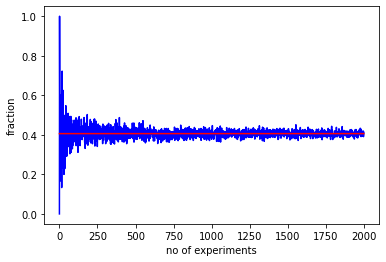

In [53]:
nexp =[ i for i in range(2001)]
fracs =[ prime_frac(h) for h in nexp]
expt = [ 13/32 for i in nexp]
plot(nexp,fracs,"b-")
plot(nexp,expt,"r-",markersize =10)
xlabel("no of experiments")
ylabel("fraction")

We see the convergence of the blue line plot ( experimental ) along the redline line one ( theoreitical). Hence the answer we ( i :P ) computed using theory is correct (**validated by experiment**)<br>
__________________________________________________________________________________________________________________

**Q3)** Lets try to solve the probelm in a *probablistic reasoning* way. Now at a particular point of distance **r** from the centre of the circle (of radius R)with this point as the midpoint. Now fixing this chord as one side of the triangle vary the third point as random point along the $\color{purple}{circumference}$ of the circle.Now from mathematical observation we can see that if the third point lies inside a particular arc of the perimeter then the final triangle formed encloses the center of the circle. Now the probability that given a fixed chord and variable third point how likeliy the triangle contains center is the<br> $\frac{arc-length}{Circumference}$ = $\mathbb{P}$ ( center inside triangle | chord ) <br> 
Call this fraction $f$(r) as it depends on the distance r and by geometry is given by $f$(r) = $\frac{1}{\pi} $${cos}^{-1}$($\frac{r}{R}$) <br>
This is a weighted fraction and we have to integrate it over the entire area and and divide by the actual unweighted area to get (avg) total probability of this condition. Note that each unique triangle is getting repeated 3 times but due to normalisation of the fraction we dont have to worry about that.<br>
$\mathbb{P}$ (center inside triangle) = $\frac{1}{\pi {R}^{2}}$ $\int_0^R$ $f(r) 2\pi r dr$ where $2\pi r dr$ is the area element. <BR>
**By doing this integration we obtain the theoretical probability as $\frac{1}{4}$**


In order to verify this experimentally , we are going to select 3 random points on a circle ie 3 azimuthal angles and plot to observe the convergence. But before we do that we need to creaye some handy functions The main idea is that the center lies inside the triangle when the triangle is an acute angled triangle and we have to check the acute angled nature of each angle using dot product of vector sides.


In [56]:
def dotpd(a,b,c): #calculates if the angle at  vertex described by a is acute or not , if acute returns +ve value
    f = (cos(a) - cos(c))*(cos(a) -cos(b)) + (sin(a) - sin(c))*(sin(a)-sin(b))
    return f 
def check(a,b,c): #checks if origin aka center lies inside triangle or not and returns one if true :))
    if ( dotpd(a,b,c) > 0 and dotpd(b,c,a) > 0 and dotpd(c,a,b) > 0 ):
        return 1
    else :
        return 0  #center on a side is nor counted 

In [57]:
def pin_3():  #plots 3 points
    a = 2*pi*random()
    b = 2*pi*random()
    c = 2*pi*random()
    points = [ a, b, c]
    return points


In [61]:
def fractor(n): # does n experiments and gives fractions satisfying our condition
    fr =0
    for i in range(n):
        os =pin_3()
        fr = fr + check(os[0] ,os[1] ,os[2])/n
    return fr
        
        

Text(0, 0.5, 'fraction')

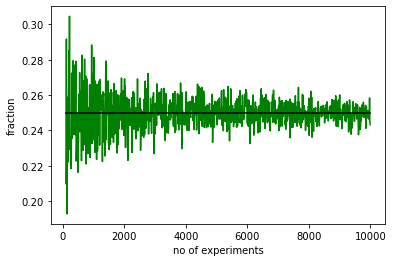

In [80]:
nexe = [ i*10 for i in range(10,1000)] #we are doing upto 10000 experiments to see if the values are converging
fct = [ fractor(h) for h in nexe ] # experimental fraction values
comp =[ 0.25 for i in nexe] #black plot ie thoeretical value for comparison
plot(nexe,fct,"g-")#green plot
plot(nexe,comp,"k-",markersize =10) # black plot for theory validation check
xlabel("no of experiments")
ylabel("fraction")

as we can see from the above plot the green line converges on the black line as n tends to a huge value . Since 3 parameters are involved the error is a bit higher than expected but graphically it promises to converge on the blackline for even higher values of n as green plots just oscillate around the black plot. From this convergence we can say that our theoritical value is correct :) <br>
__________________________________________________________________________________________________________________

**Q4)** 
##### Monte Carlo simulations


From theoretical calculations the probability that dart lands on the circle is area of circle divided by area of square. So this means the theoretical probability = $\frac{\pi R^2 }{4R^2}$ = $\frac{\pi}{4}$. If we know the experimental probability we can estimate the value of $\pi$ by multiplting the experimental probability ( fraction) with 4
 

What is this fraction. It its the no of darts landed inside the circle by total no of darts fallen inside the square ( here we safely assume that all darts are within square ). We randomise x and y coordinates of darts falling location such that x,y $\epsilon$ [-1,1] .For inside circle landing case we just have to check if $ x^2 + y^2 \le 1 $

In [24]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
from numpy.random import random
from numpy.random import randint #mathematical tool for all problems
def throw_dart():
    x = 1 - 2*random()
    y = 1 - 2*random()
    cor = [x,y]
    return cor

In [25]:
def bullseye(cord): #returns 1 if dart is inside the circle and returns zero elsewise
    if ( cord[0]*cord[0] + cord[1]*cord[1] <= 1):
        return 1
    else :
        return 0
def pi_est(n): #this function computes the approximate value of pi for n experiments.
                     #More the n better the value of pi
    frac =0
    for i in range(n):
        cord = throw_dart()
        frac = frac + bullseye(cord)/n
    return 4*frac

Now this function pi_est(n) gives a sound value or estimate for pi for a large value of n $$ \pi \approx \lim_{n \to \infty } pi \_ est(n) $$


In [21]:
pi_est(5000)

3.137599999999785

In [22]:
pi_est(6000)

3.1446666666664536

In [23]:
pi_est(7000)

3.1422857142856113

if we notice the pi_estimates give values close to 3.14 for larger no of experiments which is close to the real value of $\pi$. Hence the theorem and method is verified :)

In [29]:
pi_est(100000)

3.1422399999962387

$\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_$

**Q5)**
##### Optional Question

We can define a random chord using 3 sets of parameter variation system<br>
* each chord can be mapped to a midpoint within circle and assume each midpoint is equally likely
* each chord length can be mapped to a point on the diameter which as midpoint gives same chord lenght
* each chord length can be mapped to fixed point and a variable point on the circle 
Now each parameter can be integrated within permissible regions and be divided by total integral to give probability of chordlength greater than that of equilateral triangle.


###### Midpoint mapping case
here we by theoretical calculations we obtain the probability as $\frac{1}{4}$ and i order to simlate the midpoint selection we have to chose the (x,y) paramerterisation within unit circle domain. Since we have to do a large no of experiments we shall make only single mega function that gives satisfactional fraction for a number of experiments as calling functions in loops withing functions is extremely slow in python

In [46]:
def ratio_ar(n):
    d =0
    count = n
    for i in range(n):
        x=1-2*random() #selects x y coordinates 
        y=1-2*random()
        if(x**2 + y**2 <=1):
            if(x*x + y*y<=1/4):#if distance from origin less than 1/2 then chord length will be desirable
                d =d+1
        else:
            count = count -1 #we eliminate undesirable cases where point falls outside the unit cirlce 
    return d/count #actually this is a dependence fraction

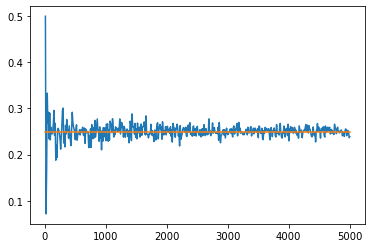

In [48]:
n_mark =[ 10*i for i in range(1,501)]
ratios =[ratio_ar(h) for h in n_mark]
theo_1=[1/4 for h in n_mark]
plot(n_mark,ratios)#no of trials in x axis and ratios in y axis
plot(n_mark,theo_1)#orange colour plot showing theoretical value

From the plot its clear that as we do nearly 5000 experiments we get the fraction value really close to the theoretical value of ratio of $\frac{desirable\_ area}{total\_area}$ = 0.25. Hnece this hypothesis is also proved feasible

###### Mapping on diameter
This one dimentional mapping is quite simple and is based on the notion that repeating the no of radii will not change the ratio. So for each chordlength we can map a point on the radius and for satisfying our condition the distance from origin of this point (midpoint ) must be greater than 0.5 units for a unit circle radius.We only need a single random variable here and the theoretical value of probability is 0.5

In [49]:
def ratio_rad(n):
    d=0
    for i in range(n):
        r= random()
        if (r<=0.5):
            d=d+1
    return d/n

Text(0, 0.5, 'ratios')

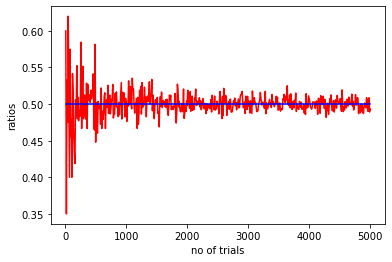

In [51]:
nos = [10*i for i in range(1,501)]
des = [ratio_rad(h) for h in nos]
theo_2 =[0.5 for h in nos]
plot(nos,des,"r-")
plot(nos,theo_2,"b-",markersize =10)
xlabel("no of trials")
ylabel("ratios")

Again its evident that for this experimental setup experimental ratios approaches the theoretical one hence proving this hypothesis as possible.

###### MAPPING TO POINT ON PERIMETER
Here what we do is that we fix a point on the perimeter and vary another point on the perimeter and see in how likely is our desirable case. From theoretical calculations the probability for this set up should be $\frac{1}{3}$. Like the above two cases here also we create a megafunction and plot to analyse the validity of theory.

In [52]:
def ratio_peri(n): # (1,0) is the fixed point and (cost,sint) is the random point
    d=0
    for i in range(n):
        t = 2*pi*random()
        if (2 -2*cos(t) >= 3 ):
            d =d +1
    return d/n

Text(0, 0.5, 'ratio')

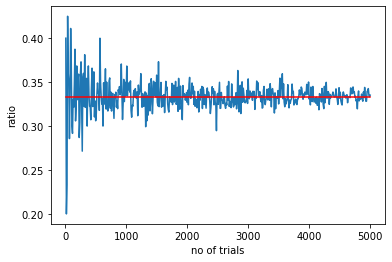

In [58]:
noe =[10*i for i in range(1,501)]
sati =[ratio_peri(h) for h in noe]
theo_3 =[1/3 for h in noe]
plot(noe,sati)
plot(noe,theo_3,"r-",markersize=10)
xlabel("no of trials")
ylabel("ratio")

      

Here also without a doubt the experimental ratios approach theoretical probability for larger no of experiments hence also showing that this hypothesis for probability calculation is also valid

##### MASTER CASE:


Here we are going to parameterise two random points on the perimeter to make a chord and calculate and compare the probabilities with these above three theorems


In [59]:
def master(n):
    d =0
    for i in range(n):
        a=2*pi*random()
        b=2*pi*random()
        if (2 -2*cos(a-b) >= 3):
            d=d+1
    return d/n

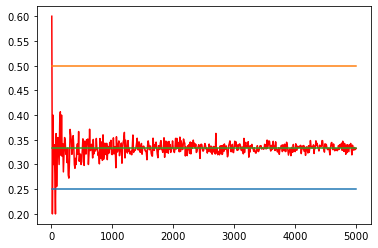

In [62]:
mas = [ master(h) for h in noe]
plot(noe,mas,"r-")
plot(noe,theo_1)
plot(noe,theo_2)
plot(noe,theo_3)
